# Imports

In [1]:
# Data Manipulation, Linear Algebra
import pandas as pd
from pandas_datareader import data as web
import numpy as numpy

# Plots
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt

# Function that Saves Stock Data to CSV

In [2]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.date(eyear, emonth, eday)
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    df.to_csv(f"./Datasets/{ticker}.csv")
    
    return df

# Function that Returns a DataFrame from a CSV

In [3]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(f"./Datasets/{ticker}.csv")
    except FileNotFoundError:
        print("File Dosen't Exist")
    else:
        return df

# Add Daily Return to DataFrame

In [4]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

def add_daily_return_to_df(df, ticker):
    df["Daily Return"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1
    df.to_csv(f"./Datasets/{ticker}.csv")
    return df

# Returns - Total Return Over Time

In [5]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['Daily Return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

# Matplotlib Finance

In [6]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv(f"./Datasets/{ticker}.csv")
    except FileNotFoundError:
        print("File Dosen't Exist")
    else:
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc', mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

# Simple Price Plot

In [7]:
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv(f"./Datasets/{ticker}.csv")
    except FileNotFoundError:
        print("File Dosen't Exist")
    else:
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,6),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

# Download Multiple Stocks

In [8]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *tickers):
    for x in tickers:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

# Merge Multiple Stocks in One DataFrame by Column Name

In [9]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, "yahoo", start, end)[col_name]
        
    return mult_df

# Get Changing Value of Investment using Multiple Stocks

In [10]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

# Get Standard Deviation for Multiple Stocks
Risk is a measure of the variability of return. Variance and Standard Deviation allow us to quantify risk.

Variance is a measure of how spread out a data set is. It is calculated as the average squared deviation of each number from the mean of a data set.n It equals the sum of the squares of the difference between each data point and the mean divided by the number of data points minus 1.

$s^2$ = $\frac{\sum (x - \hat{x})^2}{N - 1}$

Example : If we have 3 annual returns of 23%, -8% and 15%. The mean return is 10%.

- $(23 - 10)^2$ = 169
- $(-8 - 10)^2$ = 324
- $(15 - 10)^2$ = 25
- = 169 + 324 + 25 = 518 / (3-1) = 259 = 2.59
<hr />
Standard deviation is a measure of the amount of variation within a set of values. A low standard deviation indicates that the values tend to be close to the mean. A high standard deviation means values are more spread out. To get the Standard Deviation find the square root of the variance.

$\sqrt{s^2}$ = $\sqrt{2.59}$ = 1.609

In [11]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [12]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

# Test Functions

In [13]:
# Call to read the data from Yahoo into a CSV and then retrieve a Dataframe
AMZN = save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)

# Retrieve data from the CSV file
AMZN = get_df_from_csv('AMZN')
AMZN.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
244,2020-12-17,3263.510010,3221.000000,3250.000000,3236.080078,3474300,3236.080078
245,2020-12-18,3249.419922,3171.600098,3243.989990,3201.649902,5995700,3201.649902
246,2020-12-21,3226.969971,3166.000000,3200.010010,3206.179932,3836800,3206.179932
247,2020-12-22,3222.000000,3180.080078,3202.840088,3206.520020,2369400,3206.520020
248,2020-12-23,3210.129883,3184.169922,3205.000000,3185.270020,2093800,3185.270020
249,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941
250,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961
251,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000
252,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098
253,2020-12-31,3282.919922,3241.199951,3275.000000,3256.929932,2957200,3256.929932


In [14]:
# Add daily return to function
AMZN = add_daily_return_to_df(AMZN, 'AMZN')
AMZN.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close,Daily Return
244,2020-12-17,3263.510010,3221.000000,3250.000000,3236.080078,3474300,3236.080078,-0.001506
245,2020-12-18,3249.419922,3171.600098,3243.989990,3201.649902,5995700,3201.649902,-0.010639
246,2020-12-21,3226.969971,3166.000000,3200.010010,3206.179932,3836800,3206.179932,0.001415
247,2020-12-22,3222.000000,3180.080078,3202.840088,3206.520020,2369400,3206.520020,0.000106
248,2020-12-23,3210.129883,3184.169922,3205.000000,3185.270020,2093800,3185.270020,-0.006627
249,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,-0.003949
250,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,0.035071
251,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,0.011584
252,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098,-0.010882
253,2020-12-31,3282.919922,3241.199951,3275.000000,3256.929932,2957200,3256.929932,-0.008801


In [15]:
# Get total return between dates
tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

Total Return : 0.6413534880927203


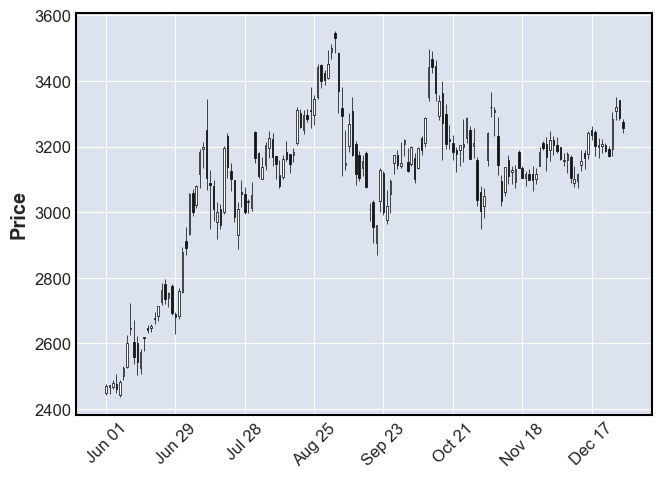

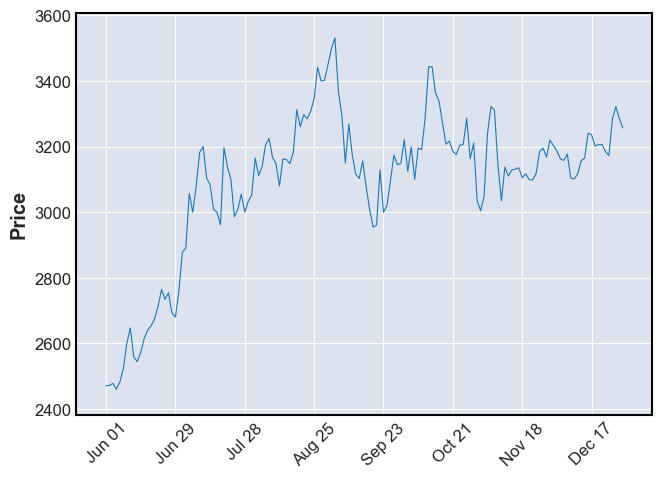

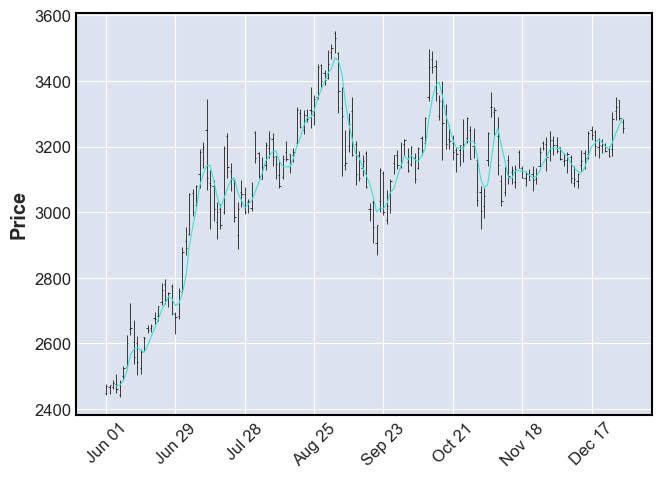

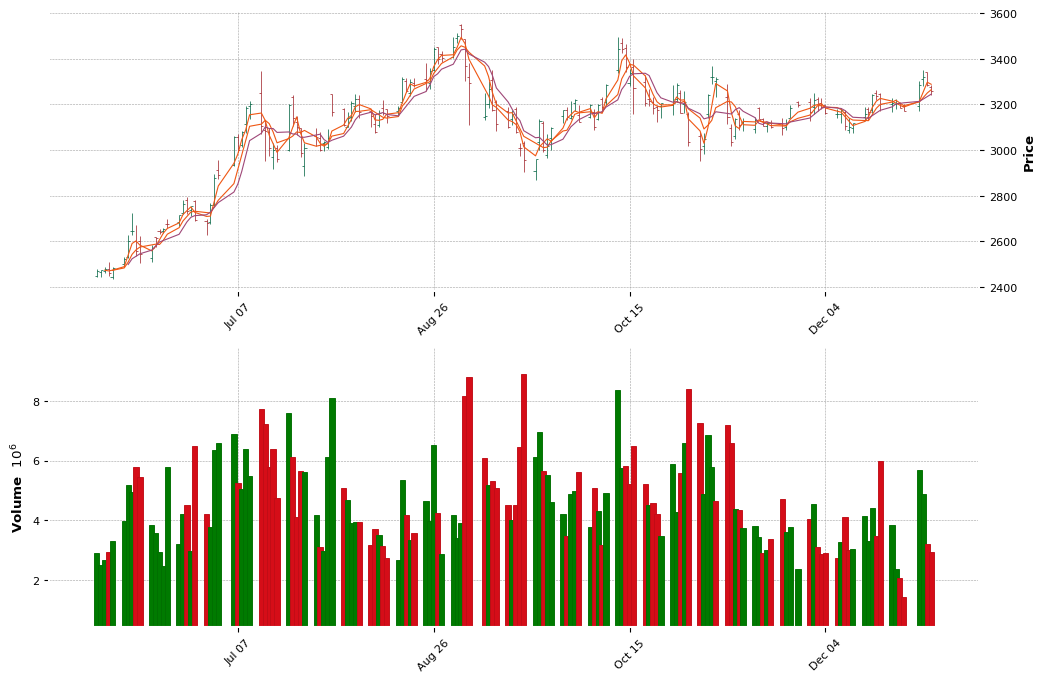

In [16]:
# Use Matplotlib finance to print multiple charts
mplfinance_plot('AMZN', 'ohlc', 2020, 6, 1, 2021, 1, 1)

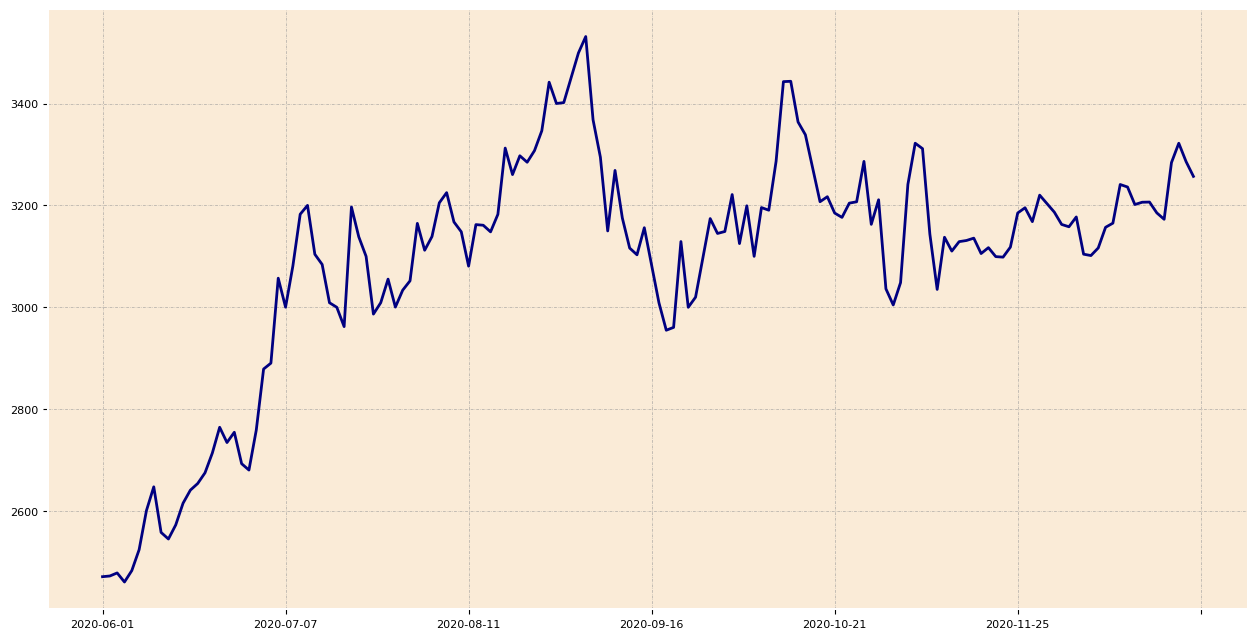

In [17]:
price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

In [18]:
# Download multiple stocks
tickers = ["FB", "AAPL", "NFLX", "GOOG"]
download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

In [19]:
# Merge dataframes from multiple stocks using the same column name
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('Adj Close',  2020, 1, 1, 2021, 1, 1, *tickers)
mult_df.tail()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-12-24,267.399994,3172.689941,131.352844,513.969971,1738.849976
2020-12-28,277.000000,3283.959961,136.050781,519.119995,1776.089966
2020-12-29,276.779999,3322.000000,134.239288,530.869995,1758.719971
2020-12-30,271.869995,3285.850098,133.094650,524.590027,1739.520020
2020-12-31,273.160004,3256.929932,132.069473,540.729980,1751.880005


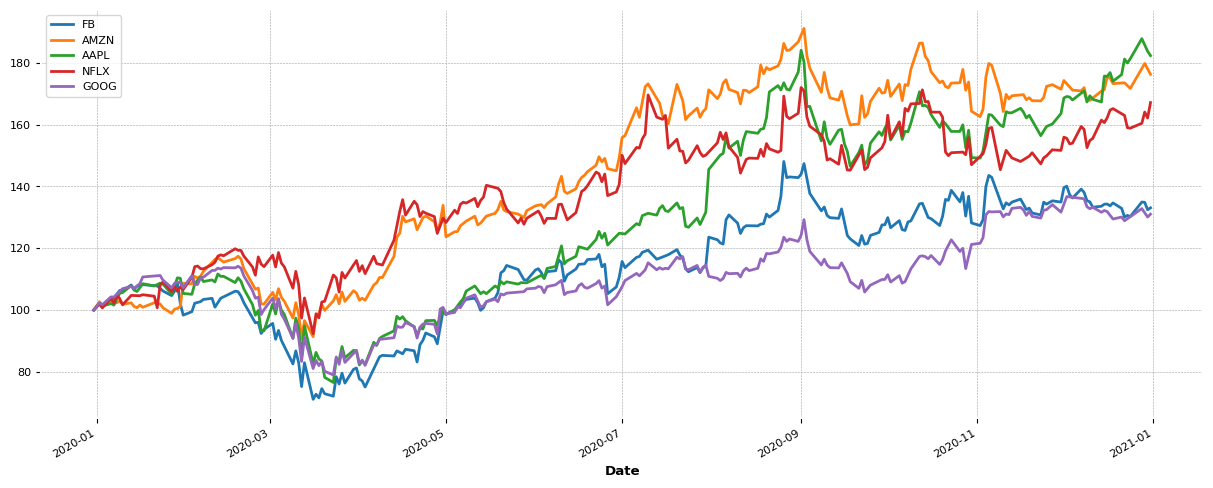

In [20]:
# Pass Investment Amount and Plot Returns using Multiple Stocks
plot_return_mult_stocks(100, mult_df)

In [21]:
# Pass multiple stocks with their adjusted close values to receive their
# different means and standard deviations
get_mult_stock_mean_sd(mult_df)
mult_df

Stock: FB   Mean:  234.44 Standard deviation: 38.53
Coefficient of Variation: 0.16436648316970504

Stock: AMZN Mean: 2677.58 Standard deviation: 547.18
Coefficient of Variation: 0.20435781754184854

Stock: AAPL Mean:   94.51 Standard deviation: 21.85
Coefficient of Variation: 0.23121430315614086

Stock: NFLX Mean:  446.34 Standard deviation: 65.94
Coefficient of Variation: 0.1477296771946909

Stock: GOOG Mean: 1480.84 Standard deviation: 175.85
Coefficient of Variation: 0.11875274192672475



,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-12-31,205.250000,1847.839966,72.443565,323.570007,1337.020020
2020-01-02,209.779999,1898.010010,74.096466,329.809998,1367.369995
2020-01-03,208.669998,1874.969971,73.376076,325.899994,1360.660034
2020-01-06,212.600006,1902.880005,73.960770,335.829987,1394.209961
2020-01-07,213.059998,1906.859985,73.612923,330.750000,1393.339966
...,...,...,...,...,...
2020-12-24,267.399994,3172.689941,131.352844,513.969971,1738.849976
2020-12-28,277.000000,3283.959961,136.050781,519.119995,1776.089966
2020-12-29,276.779999,3322.000000,134.239288,530.869995,1758.719971


#### It is hard to compare stocks by standard deviation when their stock prices
#### are so different. The coefficient of variation is the ratio between the 
#### standard deviation and the mean and it provides a comparable standard deviation
#### We get it by dividing the standard deviation by the mean cov = std / mean
#### We see here that GOOG has the least amount of variability